In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
!pip install tensorflow
!pip install keras


In [5]:
len(train_data)

8982

In [6]:
len(test_data)

2246

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

In [12]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
import numpy as np
from sympy import sequence
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results 


In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [15]:
from keras.utils.np_utils import to_categorical

In [26]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
import tensorflow as tf



In [55]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
        ])


In [56]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=('accuracy'))

In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [58]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.6649 - accuracy: 0.4827 - val_loss: 1.7220 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4595 - accuracy: 0.6824 - val_loss: 1.3754 - val_accuracy: 0.6820
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1027 - accuracy: 0.7531 - val_loss: 1.1728 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8711 - accuracy: 0.8063 - val_loss: 1.1069 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6856 - accuracy: 0.8540 - val_loss: 1.0635 - val_accuracy: 0.7670
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5518 - accuracy: 0.8812 - val_loss: 0.9793 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4438 - accuracy: 0.9038 - val_loss: 0.9620 - val_accuracy: 0.7930
Epoch 8/20
16

In [59]:
len(partial_y_train)

7982

In [60]:
model

In [61]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

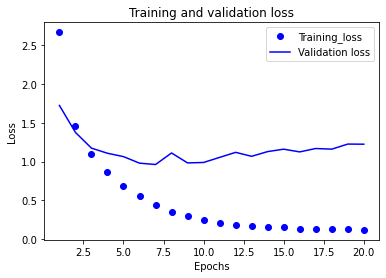

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs,loss,'bo',label= 'Training_loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [63]:
model = tf.keras.Sequential([tf.keras.layers.Dense(64,activation = 'relu'),

tf.keras.layers.Dense(46,activation = 'softmax')
    ])
model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.5975 - accuracy: 0.5482 - val_loss: 1.8276 - val_accuracy: 0.6580
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.4788 - accuracy: 0.7251 - val_loss: 1.3466 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0647 - accuracy: 0.7914 - val_loss: 1.1201 - val_accuracy: 0.7660
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8238 - accuracy: 0.8351 - val_loss: 0.9971 - val_accuracy: 0.7960
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6581 - accuracy: 0.8721 - val_loss: 0.9184 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5340 - accuracy: 0.8956 - val_loss: 0.8719 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4399 - accuracy: 0.9118 - val_loss: 0.8448 - val_accuracy: 0.8170
Epoch 8/9
16/16 [===

In [64]:
results

[0.9126157164573669, 0.7943009734153748]

In [65]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18210151380231523